# Part 1

# 1. Import NLP Library and download Stopwords

In [31]:
import nltk
nltk.download_shell()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> stopwords


        C:\Users\prati\AppData\Roaming\nltk_data...
      Package stopwords is already up-to-date!



---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


# 2. Get data and see one sample

In [39]:
messages = [line.rstrip() for line in open('SMSSpamCollection')]
print(len(messages)) # note that all the messages are list, corpus is list
messages[0]

5574


'ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [40]:
# We can see that messages are TSV tab separated values file. so lets
# import them using pandas so that we can create a dataframe of that list

In [41]:
import pandas as pd

In [43]:
msg = pd.read_csv('SMSSpamCollection', sep='\t',
                      names=['label', 'message'])
msg.head(2)

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...


In [45]:
msg.describe()
# Total count is 5572 and uniqu is 5169 this is because some of them msgs
# may be repeated like 'Sorry,i'll call later'. There are 2 unique values.

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [49]:
msg.groupby('label').describe().T

label                              ham  \
message count                     4825   
        unique                    4516   
        top     Sorry, I'll call later   
        freq                        30   

label                                                        spam  
message count                                                 747  
        unique                                                653  
        top     Please call our customer service representativ...  
        freq                                                    4

# 3.Large part is feature engineering for NLP.

In [53]:
msg['length'] = msg['message'].apply(len)
msg.head(2)

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29


#### visualization

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

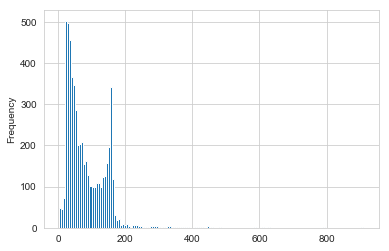

In [72]:
# Plot the length of messages in hist to see their distributions
msg['length'].plot.hist(bins=150)
# We can see there are some messages that are greater than 600 length
# they are kind of outliers , so lets go and find those

In [60]:
msg['length'].describe()
# the maximum msg length is 910 so lets find out what is it about.

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [65]:
msg[msg['length']==910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000240097C8668>,
      dtype=object)

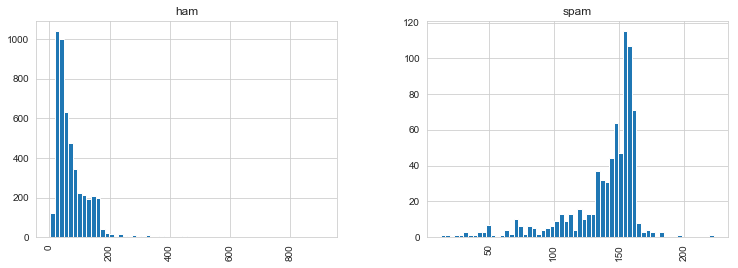

In [74]:
msg.hist(column='length', by= 'label', bins=60, figsize=(12,4))
# What we can conclude is text messages for Spam are really longer
# than the text messages for Ham.
# There fore length of the messages might be good features to analyze the
# messages either Ham or Spam

# Part2 : Text Preprocessing steps

In [75]:
import string

In [79]:
# We want to remove the Punctuations
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [81]:
# lets pass every character and check if it is not in string punctuation

In [82]:
# For Example
mess = 'Sample message! Notice: it has punctuation.'
nopunc = [c for c in mess if c not in string.punctuation]
nopunc

['S',
 'a',
 'm',
 'p',
 'l',
 'e',
 ' ',
 'm',
 'e',
 's',
 's',
 'a',
 'g',
 'e',
 ' ',
 'N',
 'o',
 't',
 'i',
 'c',
 'e',
 ' ',
 'i',
 't',
 ' ',
 'h',
 'a',
 's',
 ' ',
 'p',
 'u',
 'n',
 'c',
 't',
 'u',
 'a',
 't',
 'i',
 'o',
 'n']

In [97]:
from nltk.corpus import stopwords
stopwords.words('english')
# these words are very common english words that doesnt help ou to distinguish 
# importatn word 

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

#### Examples:

In [110]:
nopunc = ''.join(nopunc) # it helps to join the data with 'character'

In [111]:
nopunc.split() # it will split the sentence into list

['Sample', 'message', 'Notice', 'it', 'has', 'punctuation']

In [112]:
# lets use stop words to clean punc
clean_mess = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [113]:
clean_mess
# As we can see that we've removed the 'it' and 'has' word from the list

['Sample', 'message', 'Notice', 'punctuation']

#### put above step in one function

In [118]:
def test_process(messages):
    """
    1. remove punc
    2. remove stop words
    3. return list of clean text words
    """
    nopunc = [char for char in messages if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [119]:
test_process(mess)

['Sample', 'message', 'Notice', 'punctuation']

In [120]:
# As we can see that it remove the punctuation, remove stop words and give
# us the output of the list. This precess is called tokenizing.

 Tokeniing is the process of converting a normal tet string into a list of token. ie: clean version of texts words ew want

#### let's aplly that in our data

In [122]:
msg['message'].apply(test_process)

0       [Go, jurong, point, crazy, Available, bugis, n...
1                          [Ok, lar, Joking, wif, u, oni]
2       [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3           [U, dun, say, early, hor, U, c, already, say]
4       [Nah, dont, think, goes, usf, lives, around, t...
5       [FreeMsg, Hey, darling, 3, weeks, word, back, ...
6       [Even, brother, like, speak, treat, like, aids...
7       [per, request, Melle, Melle, Oru, Minnaminungi...
8       [WINNER, valued, network, customer, selected, ...
9       [mobile, 11, months, U, R, entitled, Update, l...
10      [Im, gonna, home, soon, dont, want, talk, stuf...
11      [SIX, chances, win, CASH, 100, 20000, pounds, ...
12      [URGENT, 1, week, FREE, membership, £100000, P...
13      [Ive, searching, right, words, thank, breather...
14                                         [DATE, SUNDAY]
15      [XXXMobileMovieClub, use, credit, click, WAP, ...
16                                    [Oh, kim, watching]
17      [Eh, u

# Vectorization: 

We convert message into a vector that ML will understand. For this we do three steps:
1.Count how may times does a word occur in each message(A.K.A term frequency).
2. Weigh the counts, so that frequency tokens get lower weight(Inverse document Frequncy).
3. Normalize the vectors to unit length, to abstract from the original text length (L2 norm).

In [123]:
from sklearn.feature_extraction.text import CountVectorizer

In [126]:
bow_transformer = CountVectorizer(analyzer=test_process)
# We are using the function that we created as a analyzer in CountVectorizer

In [127]:
bow_transformer.fit(msg['message'])

CountVectorizer(analyzer=<function test_process at 0x0000024009FECE18>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=None,
        stop_words=None, strip_accents=None,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, vocabulary=None)

In [128]:
print(len(bow_transformer.vocabulary_))
# 11,425 are the bag of words total returned from our data

11425


##### Let's see bag of words look like for 1 message

In [135]:
mess4 =  msg['message'][3]
print(mess4)
bow4 = bow_transformer.transform([mess4])
print(bow4)
print('\n')
# we can see there are 9 unique words. 2 on (0,4068) and 2 on (0,9554)
# lets see what are those words

print(bow4.shape) # it is one by our entire vocabulary
print(bow_transformer.get_feature_names()[9554]) # Say appears twice
print(bow_transformer.get_feature_names()[4068]) # U appears twice

U dun say so early hor... U c already then say...
  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


(1, 11425)
say
U


##### Let's see bag of words look like for entire data message as a sparse matrix

In [136]:
msg_bow = bow_transformer.transform(msg['message'])

In [137]:
print('Shape of the Sparse matrix', msg_bow.shape)

Shape of the Sparse matrix (5572, 11425)


In [139]:
msg_bow.nnz
# There are 50,548 elements are non zero inside 5572 x 11425 matrix

50548

In [141]:
sparsity = (100.0 * msg_bow.nnz / (msg_bow.shape[0] * msg_bow.shape[1]))
print('sparsity: {}'.format(sparsity))

sparsity: 0.07940295412668218


In [ ]:
# We have done counting part.lets use tfidf from sklearn for 'term weight'
# and 'normalization'

# Part3 : TFIDF, Model and validation

In [144]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer().fit(msg_bow)

In [145]:
# lets check out how tfidf looks for 1 message
tfidf4 = tfidf_transformer.transform(bow4)
print(tfidf4)

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


In [147]:
# lets do for the whole documents
tfidf_transformer.idf_[bow_transformer.vocabulary_['University']]

8.93254160700959

In [148]:
tfidf_msg = tfidf_transformer.transform(msg_bow)

### Model build of Naive Bayes

In [149]:
from sklearn.naive_bayes import MultinomialNB

In [150]:
spam_detect_model = MultinomialNB().fit(tfidf_msg, msg['label'])
# we build the naive bayes model

In [154]:
# lets apply that model in 1 document that is 4

print('predicted: ',spam_detect_model.predict(tfidf4)[0])
print('\n')
print('Actual: ',msg['label'][3])

predicted:  ham


Actual:  ham


In [156]:
# lets apply that for whole document

all_pred = spam_detect_model.predict(tfidf_msg)
all_pred

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype='<U4')

### Split the data

In [ ]:
# we've predicted ham and spam lets split the data for the validation.

In [157]:
from sklearn.model_selection import train_test_split

In [160]:
msg_train, msg_test, label_train, label_test = \
train_test_split(msg['message'], msg['label'], test_size=0.3)

In [162]:
# Now we have to do again term frequency , idf and normalization for train and test data
# pipeline will help us to do that in simple way

In [163]:
from sklearn.pipeline import Pipeline

In [164]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=test_process)),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB())
])

In [165]:
pipeline.fit(msg_train, label_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function test_process at 0x0000024009FECE18>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocesso...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [166]:
predictions = pipeline.predict(msg_test)

#### Evaluation

In [167]:
from sklearn.metrics import classification_report

In [169]:
print(classification_report(label_test,predictions))

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1449
        spam       1.00      0.72      0.84       223

   micro avg       0.96      0.96      0.96      1672
   macro avg       0.98      0.86      0.91      1672
weighted avg       0.96      0.96      0.96      1672



# Part4 : Project